<a href="https://colab.research.google.com/github/MariaAngelToro/FinalProg/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Maria Angel Toro Ramirez

1

In [ ]:
pip install ucimlrepo


2

In [ ]:
from ucimlrepo import fetch_ucirepo

# Cargar el dataset de diabetes
diabetes = fetch_ucirepo(id=891)

# Acceder a las características y etiquetas
X = diabetes.data.features
y = diabetes.data.targets

# Ver datos descriptivos y variables
print(diabetes.metadata)
print(diabetes.variables)


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

2.1

In [ ]:
# Usar directamente los datos cargados
data = X.copy()
data['target'] = y

2.2

In [ ]:
print(data.describe())


              HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.494934       0.494210       0.189571       6.608694   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  253680.000000  253680.000000         253680.000000  253680.000000   
mean        0.443169       0.040571              0.094186       0.756544   
std         0.496761       0.197294              0.292087       0.429169   
min         0.000000       0.000000              0.000000       0.000000  

3

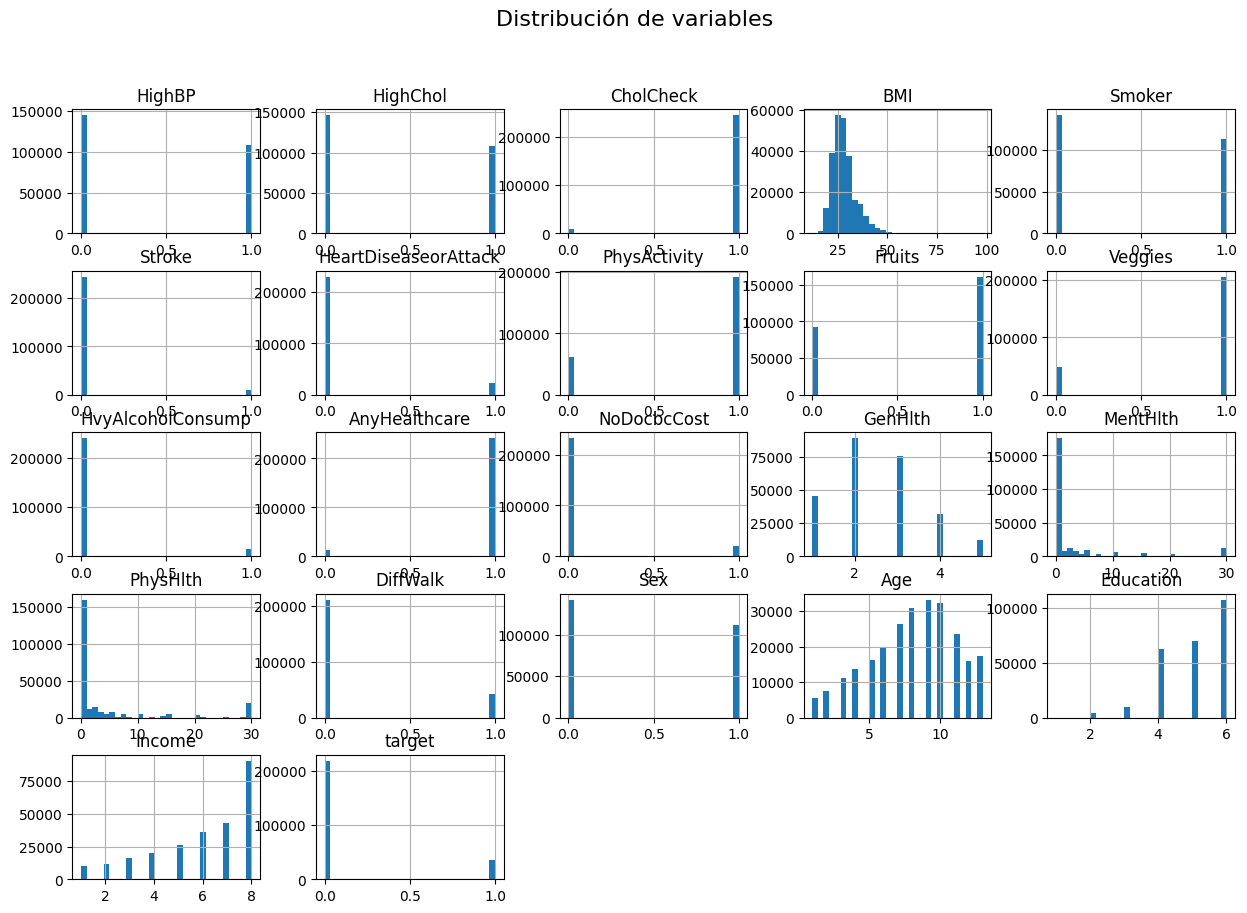

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de todas las variables numéricas
data.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribución de variables", fontsize=16)
plt.show()


3.1

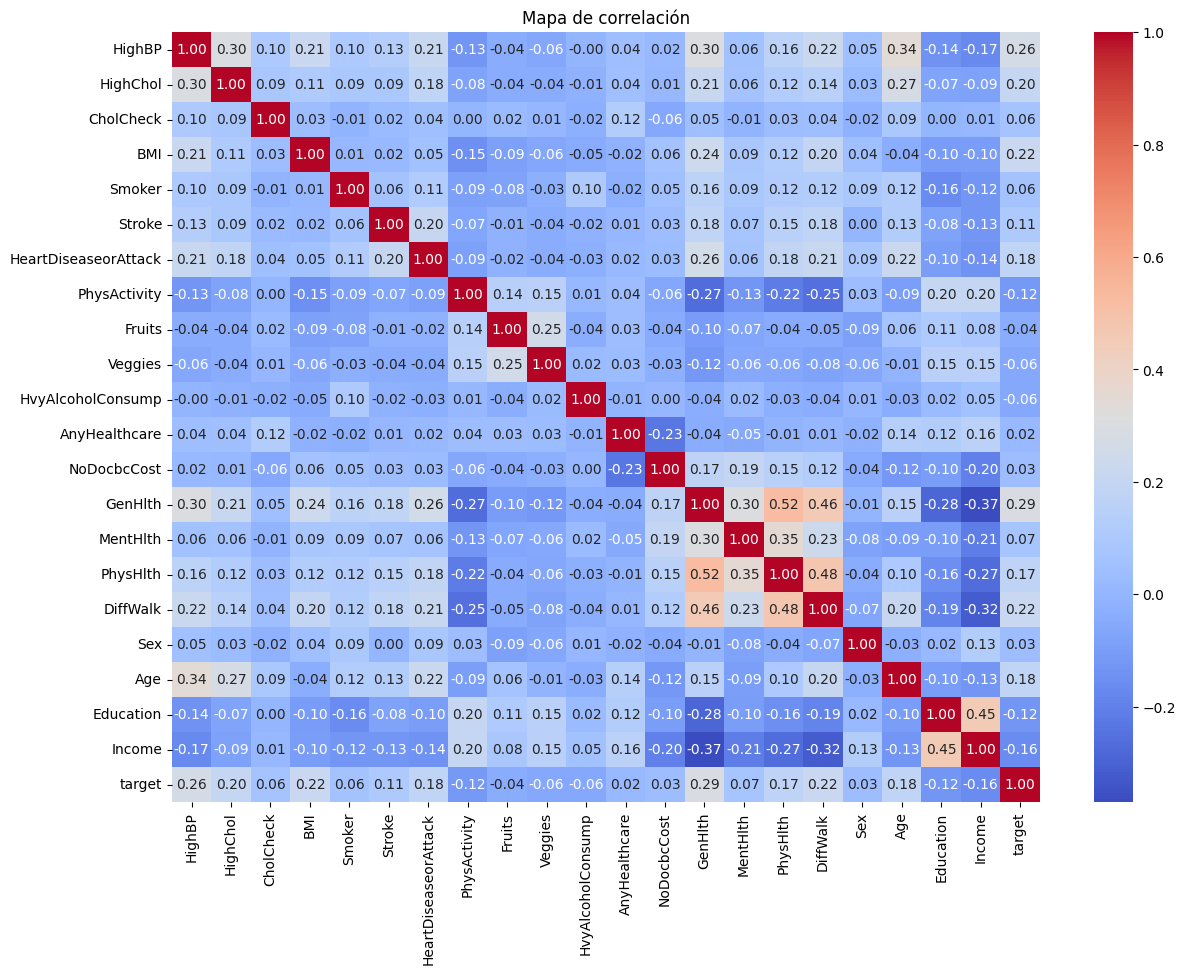

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de correlación")
plt.show()


3.2

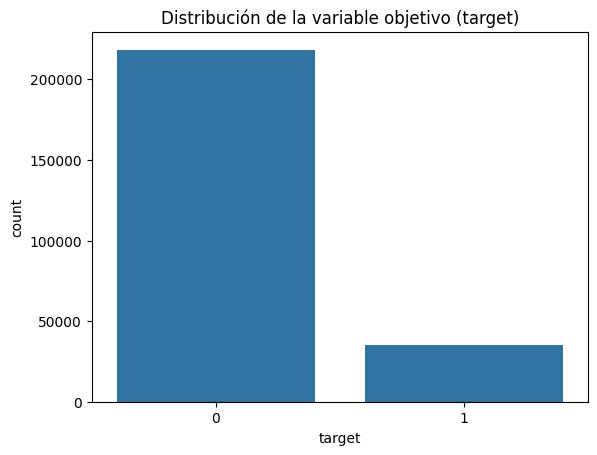

In [ ]:
sns.countplot(x='target', data=data)
plt.title("Distribución de la variable objetivo (target)")
plt.show()


4

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Unir X con y
data = X.copy()
data['target'] = y

#Verificar si hay datos faltantes
print("Valores faltantes por columna:\n", data.isnull().sum())

# Simular 5% de valores faltantes si no hay
if data.isnull().sum().sum() == 0:
    print("\nNo hay valores faltantes. Simulando 5% de valores nulos...")

    # Calcular el número total de valores a poner como NaN (~5%)
    total_values = data.size
    num_missing = int(total_values * 0.05)

    # Elegir aleatoriamente posiciones para insertar NaNs
    np.random.seed(42)
    for _ in range(num_missing):
        i = np.random.randint(0, data.shape[0])
        j = np.random.randint(0, data.shape[1] - 1)  # evitar la columna target
        data.iat[i, j] = np.nan

print("\nValores faltantes luego de simular:\n", data.isnull().sum())

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data.iloc[:, :-1]), columns=data.columns[:-1])
data_imputed['target'] = data['target'].values  # Reagregamos la columna objetivo

# Estandarizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_imputed.drop('target', axis=1))

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    data_imputed['target'],
    test_size=0.3,
    random_state=42,
    stratify=data_imputed['target']
)

print("\n✅ Preprocesamiento completo.")
print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")


Valores faltantes por columna:
 HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
target                  0
dtype: int64

No hay valores faltantes. Simulando 5% de valores nulos...

Valores faltantes luego de simular:
 HighBP                  12830
HighChol                13001
CholCheck               12858
BMI                     12969
Smoker                  13089
Stroke                  13033
HeartDiseaseorAttack    12830
PhysActivity            13015
Fruits                  12921
Veggies        

5

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Regresion logistica
best_lr = LogisticRegression(C=1, solver='liblinear', max_iter=500)
best_lr.fit(X_train, y_train)

# Random Forest
best_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
best_rf.fit(X_train, y_train)

print("✅:) Modelos entrenados con configuración rápida.")


✅:) Modelos entrenados con configuración rápida.


6

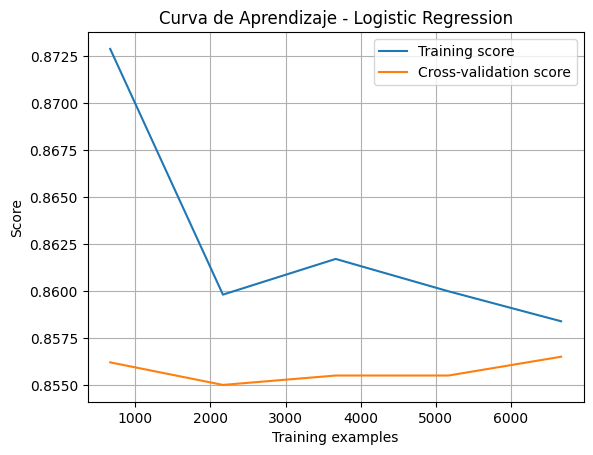

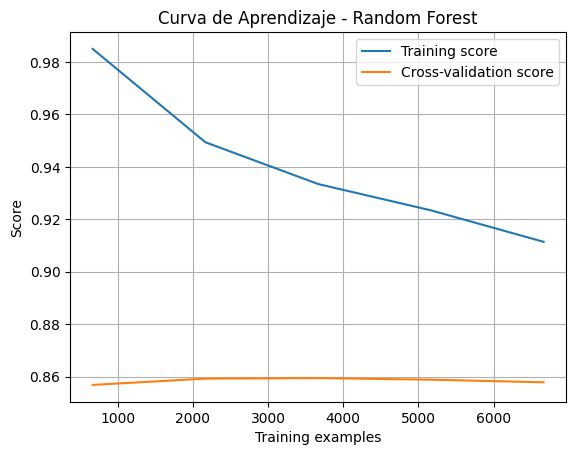

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, title, X, y):
    # Muestra más pequeña para prueba rápida
    X_small = X[:10000]  # Solo usar 10,000 ejemplos
    y_small = y[:10000]

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_small, y_small, cv=3, n_jobs=-1,  # Usar menos datos y menor cv
        train_sizes=np.linspace(0.1, 1.0, 5)  # Solo 5 tamaños de entrenamiento
    )

    plt.figure()
    plt.title(title)
    plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score")
    plt.plot(train_sizes, test_scores.mean(axis=1), label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Curvas para los modelos entrenados
plot_learning_curve(best_lr, "Curva de Aprendizaje - Logistic Regression", X_train, y_train)
plot_learning_curve(best_rf, "Curva de Aprendizaje - Random Forest", X_train, y_train)


7

📈 Logistic Regression - Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92     65500
           1       0.52      0.15      0.23     10604

    accuracy                           0.86     76104
   macro avg       0.70      0.56      0.58     76104
weighted avg       0.83      0.86      0.83     76104



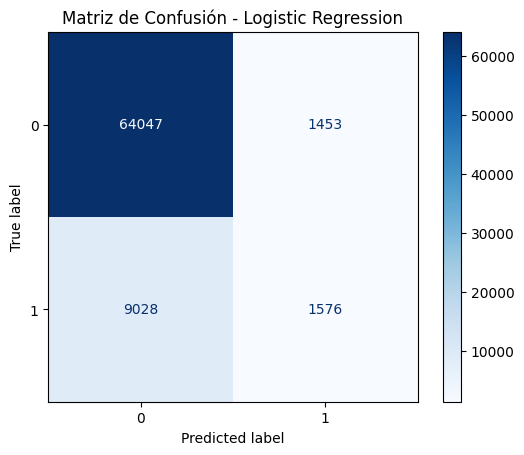

📊 Random Forest - Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     65500
           1       0.60      0.08      0.14     10604

    accuracy                           0.86     76104
   macro avg       0.73      0.54      0.53     76104
weighted avg       0.83      0.86      0.82     76104



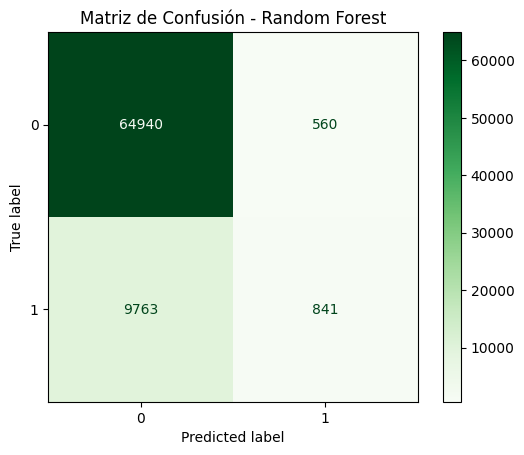

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predicciones
y_pred_lr = best_lr.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

# Logistic Regression
print("📈 Logistic Regression - Reporte de clasificación:")
print(classification_report(y_test, y_pred_lr))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap='Blues')
plt.title("Matriz de Confusión - Logistic Regression")
plt.show()

# Random Forest
print("📊 Random Forest - Reporte de clasificación:")
print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Greens')
plt.title("Matriz de Confusión - Random Forest")
plt.show()


8

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Métricas
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("🔎 Comparación de Modelos:")
print(f"Logistic Regression - Accuracy: {accuracy_lr:.3f} | F1-score: {f1_lr:.3f}")
print(f"Random Forest       - Accuracy: {accuracy_rf:.3f} | F1-score: {f1_rf:.3f}")

# Recomendación
mejor = "Random Forest" if accuracy_rf > accuracy_lr else "Logistic Regression"
print(f"\n✅ Recomendación: Usar **{mejor}** por mejor desempeño.")


🔎 Comparación de Modelos:
Logistic Regression - Accuracy: 0.862 | F1-score: 0.828
Random Forest       - Accuracy: 0.864 | F1-score: 0.817

✅ Recomendación: Usar **Random Forest** por mejor desempeño.


:)

In [ ]:
data.to_csv("dataset.csv", index=False)


In [ ]:
!git clone https://github.com/MariaAngelToro/FinalProg.git

Cloning into 'FinalProg'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
